In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot

importing Jupyter notebook from histplot.ipynb
644
3122


In [2]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [3]:
Summer17 = histplot.getData(17, direct, ASC, 197, 47, 6 , float)
Fall17 = histplot.getData(17, direct, ASC, 244, 91, 6, float)

Season17 = np.concatenate([Summer17, Fall17])

In [4]:
#2018
Winter18_1 = histplot.getData(17,direct, ASC, 335, 31, 6, float)
Winter18_2 = histplot.getData(18, direct, ASC, 1, 59, 6, float)
Spring18 = histplot.getData(18,direct, ASC, 60, 92,6, float)
Summer18 = histplot.getData(18, direct, ASC, 152, 92, 6 , float)
Fall18 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

Winter18 = np.concatenate([Winter18_1, Winter18_2])

Season18 = np.concatenate([Winter18, Spring18, Summer18, Fall18])

In [5]:
# 2019 
Winter19_1 = histplot.getData(18,direct, ASC, 335, 31, 6, float)
Winter19_2 = histplot.getData(19, direct, ASC, 1, 59, 6, float)
Spring19 = histplot.getData(19,direct, ASC, 60, 92,6, float)
Summer19 = histplot.getData(19, direct, ASC, 152, 92, 6 , float)
Fall19 = histplot.getData(19, direct, ASC, 244, 91, 6, float)

Winter19 = np.concatenate([Winter19_1, Winter19_2])

Season19 = np.concatenate([Winter19, Spring19, Summer19, Fall19])

In [6]:
#2020
Winter20_1 = histplot.getData(19,direct, ASC, 335, 31, 6, float)
Winter20_2 = histplot.getData(20, direct, ASC, 1, 60, 6, float)
Spring20 = histplot.getData(20,direct, ASC, 61, 92,6, float)
Summer20 = histplot.getData(20, direct, ASC, 153, 92, 6 , float)
Fall20 = histplot.getData(20, direct, ASC, 245, 69, 6, float)

Winter20 = np.concatenate([Winter20_1, Winter20_2])

Season20 = np.concatenate([Winter20, Spring20, Summer20, Fall20])

In [7]:
Su_precip17, Su_nonprecip17, Su_preciptotal17, Su_totalprep17 = histplot.preciphist(Summer17, len(Summer17), 5000, 1, 1)
Fprecip17, Fnonprecip17, Fpreciptotal17, Ftotalprep17 = histplot.preciphist(Fall17, len(Fall17), 5000, 1, 1)
precip17, nonprecip17, preciptotal17, totalprep17 = histplot.preciphist(Season17, len(Season17), 20000, 1, 1)


In [8]:
countAll17 = 0
for i in range(0,20000):
    hold = nonprecip17[i]
    if hold > 0:
        countAll17 += 1
nonpre_perc17 = np.zeros(50)
for i in range(0, 50):
    nonpre_perc17[i] =np.percentile(nonprecip17[:countAll17], i*2)
print(nonpre_perc17)

[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 4.0000e+00
 4.0000e+00 5.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00 8.0000e+00
 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01 1.6000e+01 2.0000e+01
 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01 1.0480e+02 2.4120e+02
 1.2352e+03 3.4692e+03]


In [46]:
def calc(precip_data, what_bin):
    hist, bin_edge = np.histogram(precip_data, bins = what_bin)
    log_y = np.log(hist)
    bin_val = np.zeros(len(what_bin)-1)
    for i in range(len(what_bin)-1):
        bin_val[i] = (what_bin[i] + what_bin[i+1])/2
    logx = np.log(bin_val)
    curve_fit = np.polyfit(logx, log_y,1)
    curve_fit[1] = np.exp(curve_fit[1])
    return curve_fit, bin_val

In [48]:
non_perc_17 = np.unique(nonpre_perc17)
print(non_perc_17)
stop1 = np.array([non_perc_17[0]])
non_perc_17 = np.setdiff1d(non_perc_17, stop1)
print(non_perc_17)

nonprecip_17, bin_val_17 = calc(nonprecip17, non_perc_17)
print(nonprecip_17)
Su_nonprecip_17, Su_bin_val_17 = calc(Su_nonprecip17, non_perc_17)
print(Su_nonprecip_17)
Fnonprecip_17, Fbin_val_17 = calc(Fnonprecip17, non_perc_17)
print(Fnonprecip_17)

[1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00 6.0000e+00
 7.0000e+00 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01
 1.6000e+01 2.0000e+01 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01
 1.0480e+02 2.4120e+02 1.2352e+03 3.4692e+03]
[2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00
 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01 1.6000e+01
 2.0000e+01 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01 1.0480e+02
 2.4120e+02 1.2352e+03 3.4692e+03]
[-0.13403334 33.28984693]
[-0.15305447 12.41329613]
[-0.11658578 19.36833465]


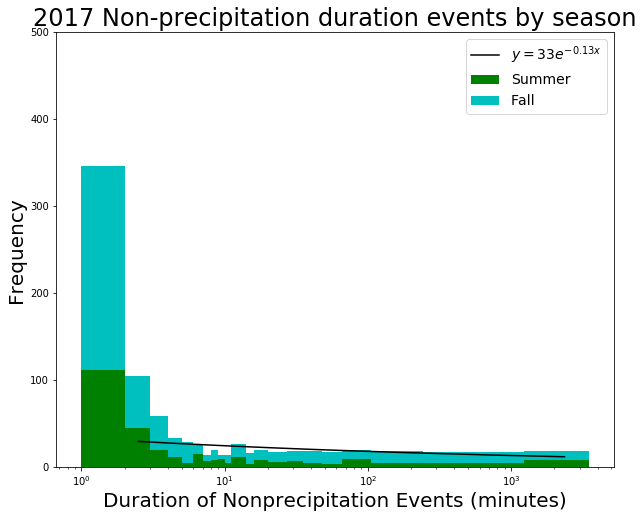

In [50]:
plt.figure(figsize = (10,8))
plt.hist([ Su_nonprecip17,Fnonprecip17], bins =nonpre_perc17, range= (nonpre_perc17.min,nonpre_perc17.max), color = ['g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(bin_val_17, nonprecip_17[1]*np.exp(np.log(bin_val_17)*nonprecip_17[0]), color = 'k' )
plt.legend(labels = ['$y = 33 e^{-0.13x}$', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [13]:
countAll_17 = 0
for i in range(0,20000):
    hold = precip17[i]
    if hold > 0:
        countAll_17 += 1
int_perc17 = np.zeros(50)
inten17 = np.divide(preciptotal17[:countAll_17], precip17[:countAll_17])
for i in range(0, 50):
    int_perc17[i] =np.percentile(inten17, i*2)
print(int_perc17)

Su_count17 = 0 
Fcount17= 0
for i in range(5000):
    hold1 = Su_precip17[i]
    hold2 = Fprecip17[i]
    if hold1 > 0 : 
        Su_count17 += 1
    if hold2 > 0 : 
        Fcount17 += 1

#print(inten17)
Su_inten17 = np.divide(Su_preciptotal17[:Su_count17],Su_precip17[:Su_count17]  )
Finten17 = np.divide(Fpreciptotal17[:Fcount17], Fprecip17[:Fcount17] )


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.0125
 0.01333333 0.015      0.015      0.01625    0.018      0.02
 0.02147619 0.02443636 0.02898333 0.03545455 0.04       0.04879655
 0.06466207 0.11948718]


In [14]:
intensa17 = np.unique(int_perc17)
print(intensa17)
one = [intensa17[0], intensa17[1]]
intens17 = np.setdiff1d(intensa17, one)
print(intens17)

[0.01       0.01       0.0125     0.01333333 0.015      0.01625
 0.018      0.02       0.02147619 0.02443636 0.02898333 0.03545455
 0.04       0.04879655 0.06466207 0.11948718]
[0.0125     0.01333333 0.015      0.01625    0.018      0.02
 0.02147619 0.02443636 0.02898333 0.03545455 0.04       0.04879655
 0.06466207 0.11948718]


In [15]:
int_17coef = calc(inten17, intens17)
print(int_17coef)

[-0.06830242 14.31578744]


In [16]:
intensity17 = np.append([0.01], intens17)
print(intensity17)

[0.01       0.0125     0.01333333 0.015      0.01625    0.018
 0.02       0.02147619 0.02443636 0.02898333 0.03545455 0.04
 0.04879655 0.06466207 0.11948718]


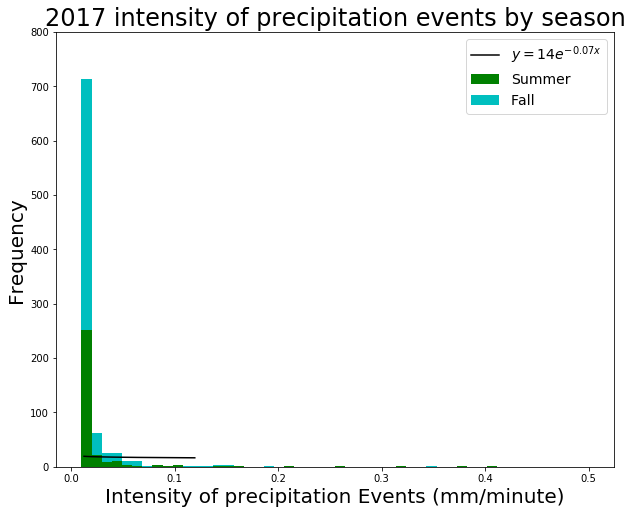

In [18]:
plt.figure(figsize = (10,8))
plt.hist([ Su_inten17,Finten17], bins = 50, range= (0.01,0.5), color = ['g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
#plt.xscale('log')
plt.ylim(0,800)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(intens17, int_17coef[1]*np.exp(np.log(intens17)*int_17coef[0]), color = 'k' )
plt.legend(labels = ['$y = 14 e^{-0.07x}$', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [19]:
# 2018 
Wprecip18, Wnonprecip18, Wpreciptotal18, Wtotalprep18 = histplot.preciphist(Winter18, len(Winter18), 5000, 1, 1)
Sp_precip18, Sp_nonprecip18, Sp_preciptotal18, Sp_totalprep18 = histplot.preciphist(Spring18, len(Spring18), 5000, 1, 1)
Su_precip18, Su_nonprecip18, Su_preciptotal18, Su_totalprep18 = histplot.preciphist(Summer18, len(Summer18), 5000, 1, 1)
Fprecip18, Fnonprecip18, Fpreciptotal18, Ftotalprep18 = histplot.preciphist(Fall18, len(Fall18), 5000, 1, 1)

precip18, nonprecip18, preciptotal18, totalprep18 = histplot.preciphist(Season18, len(Season18), 20000, 1, 1)
countAll18 = 0
for i in range(0,20000):
    hold = nonprecip18[i]
    if hold > 0:
        countAll18 += 1
nonpre_perc18 = np.zeros(50)
for i in range(0, 50):
    nonpre_perc18[i] =np.percentile(nonprecip18[:countAll18], i*2)
print(nonpre_perc18)

[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00
 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00
 3.000e+00 3.000e+00 3.000e+00 4.000e+00 4.000e+00 4.000e+00 5.000e+00
 6.000e+00 6.000e+00 7.000e+00 9.000e+00 1.000e+01 1.200e+01 1.400e+01
 1.800e+01 2.400e+01 3.200e+01 4.700e+01 8.100e+01 1.650e+02 4.240e+02
 2.321e+03]


In [20]:
non_perc_18 = np.unique(nonpre_perc18)
print(non_perc_18)
stop2 = np.array([non_perc_18[0]])
non_perc_18 = np.setdiff1d(non_perc_18, stop2)
print(non_perc_18)

nonprecip_18 = calc(nonprecip18, non_perc_18)
print(nonprecip_18)
# Seasonal breakdown
Wnonprecip_18 = calc(Wnonprecip18, non_perc_18)
print(Wnonprecip_18)

Sp_nonprecip_18 = calc(Sp_nonprecip18, non_perc_18)
print(Sp_nonprecip_18)

Su_nonprecip_18 = calc(Su_nonprecip18, non_perc_18)
print(Su_nonprecip_18)

Fnonprecip_18 = calc(Fnonprecip18, non_perc_18)
print(Fnonprecip_18)

[1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00 7.000e+00
 9.000e+00 1.000e+01 1.200e+01 1.400e+01 1.800e+01 2.400e+01 3.200e+01
 4.700e+01 8.100e+01 1.650e+02 4.240e+02 2.321e+03]
[2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00 7.000e+00 9.000e+00
 1.000e+01 1.200e+01 1.400e+01 1.800e+01 2.400e+01 3.200e+01 4.700e+01
 8.100e+01 1.650e+02 4.240e+02 2.321e+03]
[ -0.20277413 188.99889931]
[-0.28216169 59.46313562]
[-0.19601844 49.98298568]
[-0.09882134 26.14583113]
[-0.22056886 55.19908197]


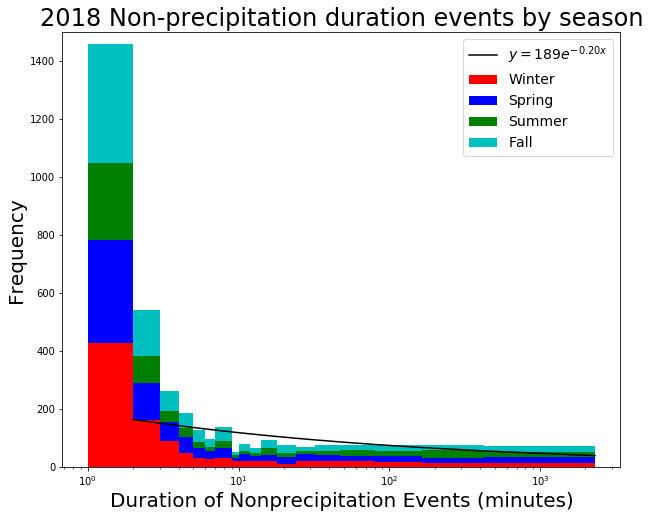

In [21]:
plt.figure(figsize = (10,8))
plt.hist([ Wnonprecip18, Sp_nonprecip18, Su_nonprecip18,Fnonprecip18], bins =nonpre_perc18, range= (nonpre_perc18.min,nonpre_perc18.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(non_perc_18, nonprecip_18[1]*np.exp(np.log(non_perc_18)*nonprecip_18[0]), color = 'k' )
plt.legend(labels = ['$y = 189 e^{-0.20x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [22]:
countAll_18 = 0
for i in range(0,20000):
    hold = precip18[i]
    if hold > 0:
        countAll_18 += 1
int_perc18 = np.zeros(50)
inten18 = np.divide(preciptotal18[:countAll_18], precip18[:countAll_18])
print(inten18)
for i in range(0, 50):
    int_perc18[i] =np.percentile(inten18, i*2)
#print(int_perc18)

Wcount18 = 0 
Sp_count18= 0
Su_count18 = 0 
Fcount18= 0
for i in range(5000):
    hold1 = Wprecip18[i]
    hold2 = Sp_precip18[i]
    hold3 = Su_precip18[i]
    hold4 = Fprecip18[i]
    if hold1 > 0:
        Wcount18 += 1
    if hold2 > 0:
        Sp_count18 += 1
    if hold3 > 0 : 
        Su_count18 += 1
    if hold4 > 0 : 
        Fcount18 += 1

#print(inten17)
Winten18 = np.divide(Wpreciptotal18[:Wcount18], Wprecip18[:Wcount18] )
Sp_inten18 = np.divide(Sp_preciptotal18[:Sp_count18],Sp_precip18[:Sp_count18]  )
Su_inten18 = np.divide(Su_preciptotal18[:Su_count18],Su_precip18[:Su_count18]  )
Finten18 = np.divide(Fpreciptotal18[:Fcount18], Fprecip18[:Fcount18] )

[0.01 0.01 0.01 ... 0.01 0.01 0.01]


In [23]:
intensa18 = np.unique(int_perc18)
print(intensa18)
one = [intensa18[0], intensa18[1]]
intens18 = np.setdiff1d(intensa18, one)
print(intens18)

[0.01       0.01       0.01181818 0.01333333 0.01428571 0.015
 0.01666667 0.01861111 0.02       0.02384615 0.02916667 0.035
 0.04615385 0.0625     0.108     ]
[0.01181818 0.01333333 0.01428571 0.015      0.01666667 0.01861111
 0.02       0.02384615 0.02916667 0.035      0.04615385 0.0625
 0.108     ]


In [26]:
int_18coef = calc(inten18, intens18)
print(int_18coef)

[-0.46701408 19.38386852]


In [25]:
intensity18 = np.append([0.01], intens18)
print(intensity18)
two = [intensity18[1],intensity18[2],intensity18[3], intensity18[4], intensity18[5], intensity18[6]]
changestuff = np.setdiff1d(intensity18, two)
print(changestuff)
intensity18 = changestuff
intens18 = np.setdiff1d(intensity18, [0.01])
print(intens18)

[0.01       0.01181818 0.01333333 0.01428571 0.015      0.01666667
 0.01861111 0.02       0.02384615 0.02916667 0.035      0.04615385
 0.0625     0.108     ]
[0.01       0.02       0.02384615 0.02916667 0.035      0.04615385
 0.0625     0.108     ]
[0.02       0.02384615 0.02916667 0.035      0.04615385 0.0625
 0.108     ]


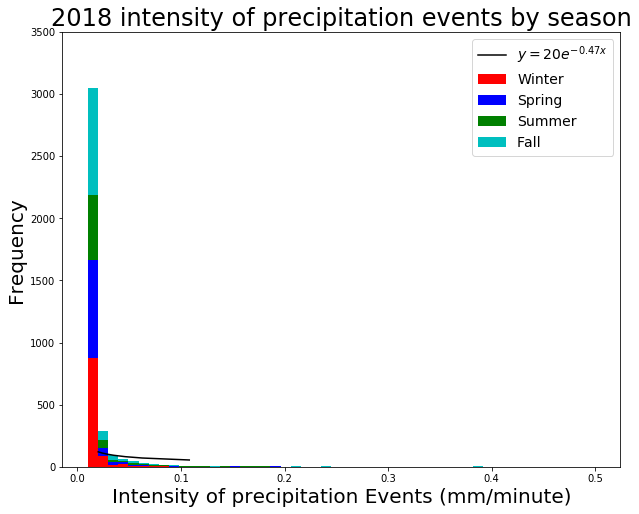

In [27]:
plt.figure(figsize = (10,8))
plt.hist([ Winten18, Sp_inten18, Su_inten18,Finten18], bins = 50, range= (0.01, 0.5), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
#plt.xscale('log')
plt.ylim(0,3500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(intens18, int_18coef[1]*np.exp(np.log(intens18)*int_18coef[0]), color = 'k' )
plt.legend(labels = ['$y = 20 e^{-0.47x}$', 'Winter','Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [28]:
Wprecip19, Wnonprecip19, Wpreciptotal19, Wtotalprep19 = histplot.preciphist(Winter19, len(Winter19), 5000, 1, 1)
Sp_precip19, Sp_nonprecip19, Sp_preciptotal19, Sp_totalprep19 = histplot.preciphist(Spring19, len(Spring19), 5000, 1, 1)
Su_precip19, Su_nonprecip19, Su_preciptotal19, Su_totalprep19 = histplot.preciphist(Summer19, len(Summer19), 5000, 1, 1)
Fprecip19, Fnonprecip19, Fpreciptotal19, Ftotalprep19 = histplot.preciphist(Fall19, len(Fall19), 5000, 1, 1)
precip19, nonprecip19, preciptotal19, totalprep19 = histplot.preciphist(Season19, len(Season19), 20000, 1, 1)


In [29]:
countAll19 = 0
for i in range(0,20000):
    hold = nonprecip19[i]
    if hold > 0:
        countAll19 += 1
nonpre_perc19 = np.zeros(50)
for i in range(0, 50):
    nonpre_perc19[i] =np.percentile(nonprecip19[:countAll19], i*2)
print(nonpre_perc19)

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00
 3.00000e+00 4.00000e+00 4.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01
 2.10000e+01 2.70000e+01 3.80000e+01 5.30000e+01 8.94800e+01 2.06180e+02
 5.93120e+02 2.76686e+03]


In [30]:
non_perc_19 = np.unique(nonpre_perc19)
print(non_perc_19)
stop3 = np.array([non_perc_19[0]])
non_perc_19 = np.setdiff1d(non_perc_19, stop3)
print(non_perc_19)

nonprecip_19 = calc(nonprecip19, non_perc_19)
print(nonprecip_19)
# Seasonal 
Wnonprecip_19 = calc(Wnonprecip19, non_perc_19)
print(Wnonprecip_19)
Sp_nonprecip_19 = calc(Sp_nonprecip19, non_perc_19)
print(Sp_nonprecip_19)
Su_nonprecip_19 = calc(Su_nonprecip19, non_perc_19)
print(Su_nonprecip_19)
Fnonprecip_19 = calc(Fnonprecip19, non_perc_19)
print(Fnonprecip_19)

[1.00000e+00 2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01
 2.10000e+01 2.70000e+01 3.80000e+01 5.30000e+01 8.94800e+01 2.06180e+02
 5.93120e+02 2.76686e+03]
[2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00 7.00000e+00
 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01 2.10000e+01
 2.70000e+01 3.80000e+01 5.30000e+01 8.94800e+01 2.06180e+02 5.93120e+02
 2.76686e+03]
[ -0.16418785 136.34126855]
[-0.30067297 62.52036524]
[-0.16076766 45.74625789]
[ 0.02956593 11.2199603 ]
[-0.16054048 23.73894038]


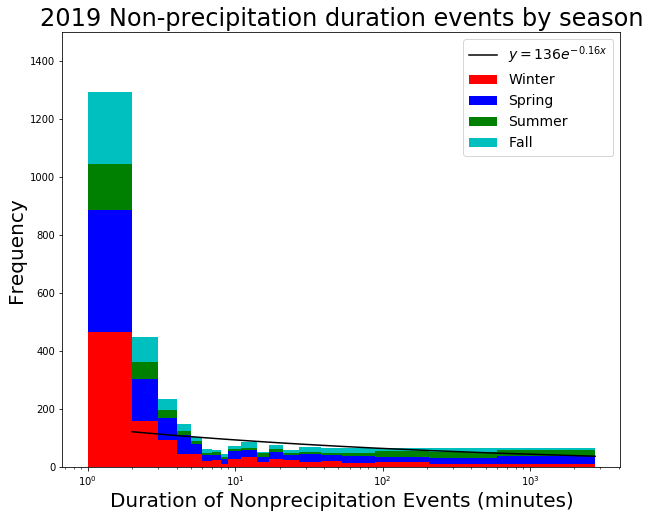

In [31]:
plt.figure(figsize = (10,8))
plt.hist([ Wnonprecip19, Sp_nonprecip19, Su_nonprecip19,Fnonprecip19], bins =nonpre_perc19, range= (nonpre_perc19.min,nonpre_perc19.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(non_perc_19, nonprecip_19[1]*np.exp(np.log(non_perc_19)*nonprecip_19[0]), color = 'k' )
plt.legend(labels = ['$y = 136 e^{-0.16x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [32]:
countAll_19 = 0
for i in range(0,20000):
    hold = precip19[i]
    if hold > 0:
        countAll_19 += 1
int_perc19 = np.zeros(50)
inten19 = np.divide(preciptotal19[:countAll_19], precip19[:countAll_19])
print(inten19)
for i in range(0, 50):
    int_perc19[i] =np.percentile(inten19, i*2)
#print(int_perc18)

Wcount19 = 0 
Sp_count19= 0
Su_count19 = 0 
Fcount19= 0
for i in range(5000):
    hold1 = Wprecip19[i]
    hold2 = Sp_precip19[i]
    hold3 = Su_precip19[i]
    hold4 = Fprecip19[i]
    if hold1 > 0:
        Wcount19 += 1
    if hold2 > 0:
        Sp_count19 += 1
    if hold3 > 0 : 
        Su_count19 += 1
    if hold4 > 0 : 
        Fcount19 += 1

#print(inten17)
Winten19 = np.divide(Wpreciptotal19[:Wcount19], Wprecip19[:Wcount19] )
Sp_inten19 = np.divide(Sp_preciptotal19[:Sp_count19],Sp_precip19[:Sp_count19]  )
Su_inten19 = np.divide(Su_preciptotal19[:Su_count19],Su_precip19[:Su_count19]  )
Finten19 = np.divide(Fpreciptotal19[:Fcount19], Fprecip19[:Fcount19] )

[0.01       0.01       0.01428571 ... 0.01       0.01       0.03      ]


In [33]:
intensa19 = np.unique(int_perc19)
print(intensa19)
one = [intensa19[0], intensa19[1], intensa19[2]]
intens19 = np.setdiff1d(intensa19, one)
print(intens19)

[0.01       0.01       0.01       0.012      0.01333333 0.015
 0.015      0.01666667 0.018      0.02       0.02274848 0.02655439
 0.03093636 0.03771048 0.04722662 0.06676667 0.11932857]
[0.012      0.01333333 0.015      0.015      0.01666667 0.018
 0.02       0.02274848 0.02655439 0.03093636 0.03771048 0.04722662
 0.06676667 0.11932857]


In [34]:
intensity19 = np.append([0.01], intens19)
print(intensity19)
two = [intensity19[1],intensity19[2],intensity19[3], intensity19[4], intensity19[5], intensity19[6]]
changestuff1 = np.setdiff1d(intensity19, two)
print(changestuff1)
intensity19 = changestuff1
intens19 = np.setdiff1d(intensity19, [0.01])
print(intens19)

[0.01       0.012      0.01333333 0.015      0.015      0.01666667
 0.018      0.02       0.02274848 0.02655439 0.03093636 0.03771048
 0.04722662 0.06676667 0.11932857]
[0.01       0.02       0.02274848 0.02655439 0.03093636 0.03771048
 0.04722662 0.06676667 0.11932857]
[0.02       0.02274848 0.02655439 0.03093636 0.03771048 0.04722662
 0.06676667 0.11932857]


In [35]:
int_19coef = calc(inten19, intens19)
print(int_19coef)

[-0.33903507 24.14247544]


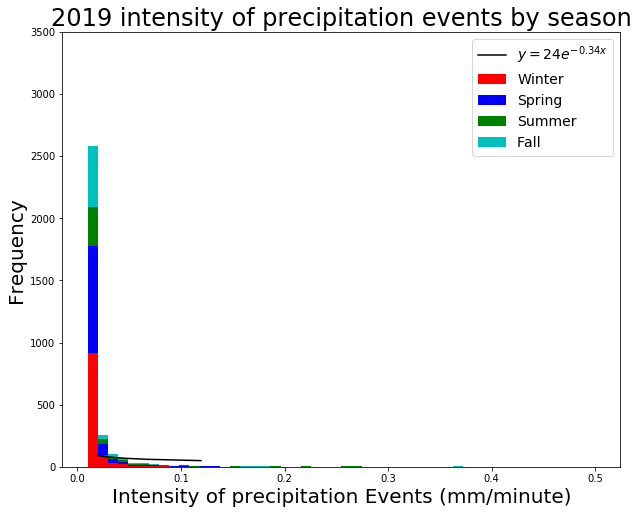

In [36]:
plt.figure(figsize = (10,8))
plt.hist([ Winten19, Sp_inten19, Su_inten19,Finten19], bins = 50, range= (0.01,0.5), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
#plt.xscale('log')
plt.ylim(0,3500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(intens19, int_19coef[1]*np.exp(np.log(intens19)*int_19coef[0]), color = 'k' )
plt.legend(labels = ['$y = 24 e^{-0.34x}$', 'Winter','Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [37]:
Wprecip20, Wnonprecip20, Wpreciptotal20, Wtotalprep20 = histplot.preciphist(Winter20, len(Winter20), 5000, 1, 1)
Sp_precip20, Sp_nonprecip20, Sp_preciptotal20, Sp_totalprep20 = histplot.preciphist(Spring20, len(Spring20), 5000, 1, 1)
Su_precip20, Su_nonprecip20, Su_preciptotal20, Su_totalprep20 = histplot.preciphist(Summer20, len(Summer20), 5000, 1, 1)
Fprecip20, Fnonprecip20, Fpreciptotal20, Ftotalprep20 = histplot.preciphist(Fall20, len(Fall20), 5000, 1, 1)

precip20, nonprecip20, preciptotal20, totalprep20 = histplot.preciphist(Season20, len(Season20), 20000, 1, 1)

In [38]:
countAll20 = 0
for i in range(0,20000):
    hold = nonprecip20[i]
    if hold > 0:
        countAll20 += 1
nonpre_perc20 = np.zeros(50)
for i in range(0, 50):
    nonpre_perc20[i] =np.percentile(nonprecip20[:countAll20], i*2)
print(nonpre_perc20)

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00
 3.00000e+00 4.00000e+00 4.00000e+00 5.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 8.00000e+00 1.00000e+01 1.20000e+01 1.40000e+01 1.80000e+01
 2.20000e+01 2.93600e+01 4.00000e+01 6.40000e+01 1.04000e+02 2.20000e+02
 6.97680e+02 2.35048e+03]


In [39]:
non_perc_20 = np.unique(nonpre_perc20)
print(non_perc_20)
stop4 = np.array([non_perc_20[0]])
non_perc_20 = np.setdiff1d(non_perc_20, stop4)
print(non_perc_20)

nonprecip_20 = calc(nonprecip20, non_perc_20)
print(nonprecip_20)
Wnonprecip_20 = calc(Wnonprecip20, non_perc_20)
print(Wnonprecip_20)
Sp_nonprecip_20 = calc(Sp_nonprecip20, non_perc_20)
print(Sp_nonprecip_20)
Su_nonprecip_20 = calc(Su_nonprecip20, non_perc_20)
print(Su_nonprecip_20)
Fnonprecip_20 = calc(Fnonprecip20, non_perc_20)
print(Fnonprecip_20)

[1.00000e+00 2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 8.00000e+00 1.00000e+01 1.20000e+01 1.40000e+01 1.80000e+01
 2.20000e+01 2.93600e+01 4.00000e+01 6.40000e+01 1.04000e+02 2.20000e+02
 6.97680e+02 2.35048e+03]
[2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00 7.00000e+00
 8.00000e+00 1.00000e+01 1.20000e+01 1.40000e+01 1.80000e+01 2.20000e+01
 2.93600e+01 4.00000e+01 6.40000e+01 1.04000e+02 2.20000e+02 6.97680e+02
 2.35048e+03]
[ -0.16901292 140.33214934]
[-0.23355207 63.65359103]
[-0.16435054 46.11094417]
[-0.02664239 13.3534197 ]
[-0.2056147  19.66853044]


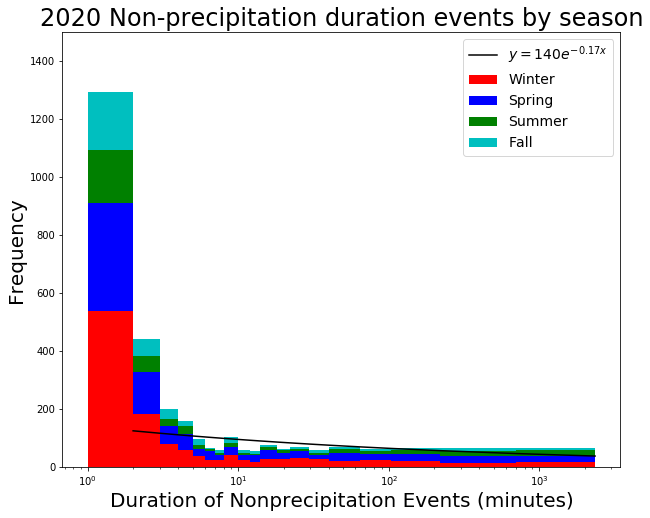

In [40]:
plt.figure(figsize = (10,8))
plt.hist([ Wnonprecip20, Sp_nonprecip20, Su_nonprecip20, Fnonprecip20], bins =nonpre_perc20, range= (nonpre_perc20.min,nonpre_perc20.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(non_perc_20, nonprecip_20[1]*np.exp(np.log(non_perc_20)*nonprecip_20[0]), color = 'k' )
plt.legend(labels = ['$y = 140 e^{-0.17x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [41]:
countAll_20 = 0
for i in range(0,20000):
    hold = precip20[i]
    if hold > 0:
        countAll_20 += 1
int_perc20 = np.zeros(50)
inten20 = np.divide(preciptotal20[:countAll_20], precip20[:countAll_20])
print(inten20)
for i in range(0, 50):
    int_perc20[i] =np.percentile(inten20, i*2)
#print(int_perc18)

Wcount20 = 0 
Sp_count20= 0
Su_count20 = 0 
Fcount20= 0
for i in range(5000):
    hold1 = Wprecip20[i]
    hold2 = Sp_precip20[i]
    hold3 = Su_precip20[i]
    hold4 = Fprecip20[i]
    if hold1 > 0:
        Wcount20 += 1
    if hold2 > 0:
        Sp_count20 += 1
    if hold3 > 0 : 
        Su_count20 += 1
    if hold4 > 0 : 
        Fcount20 += 1

#print(inten17)
Winten20 = np.divide(Wpreciptotal20[:Wcount20], Wprecip20[:Wcount20] )
Sp_inten20 = np.divide(Sp_preciptotal20[:Sp_count20],Sp_precip20[:Sp_count20]  )
Su_inten20 = np.divide(Su_preciptotal20[:Su_count20],Su_precip20[:Su_count20]  )
Finten20 = np.divide(Fpreciptotal20[:Fcount20], Fprecip20[:Fcount20] )

[0.02  0.025 0.01  ... 0.01  0.01  0.01 ]


In [42]:
intensa20 = np.unique(int_perc20)
print(intensa20)
one = [intensa20[0], intensa20[1], intensa20[2]]
intens20 = np.setdiff1d(intensa20, one)
print(intens20)

[0.01       0.01       0.01       0.01224274 0.01333333 0.01439444
 0.015      0.01666667 0.01886667 0.02       0.02125    0.02540789
 0.03       0.04       0.05203573 0.0859619 ]
[0.01224274 0.01333333 0.01439444 0.015      0.01666667 0.01886667
 0.02       0.02125    0.02540789 0.03       0.04       0.05203573
 0.0859619 ]


In [43]:
intensity20 = np.append([0.01], intens20)
print(intensity20)
two = [intensity20[1],intensity20[2],intensity20[3], intensity20[4], intensity20[5], intensity20[6]]
changestuff2 = np.setdiff1d(intensity20, two)
print(changestuff2)
intensity20= changestuff2
intens20 = np.setdiff1d(intensity20, [0.01])
print(intens20)

[0.01       0.01224274 0.01333333 0.01439444 0.015      0.01666667
 0.01886667 0.02       0.02125    0.02540789 0.03       0.04
 0.05203573 0.0859619 ]
[0.01       0.02       0.02125    0.02540789 0.03       0.04
 0.05203573 0.0859619 ]
[0.02       0.02125    0.02540789 0.03       0.04       0.05203573
 0.0859619 ]


In [44]:
int_20coef = calc(inten20, intens20)
print(int_20coef)

[-0.18360925 37.03192875]


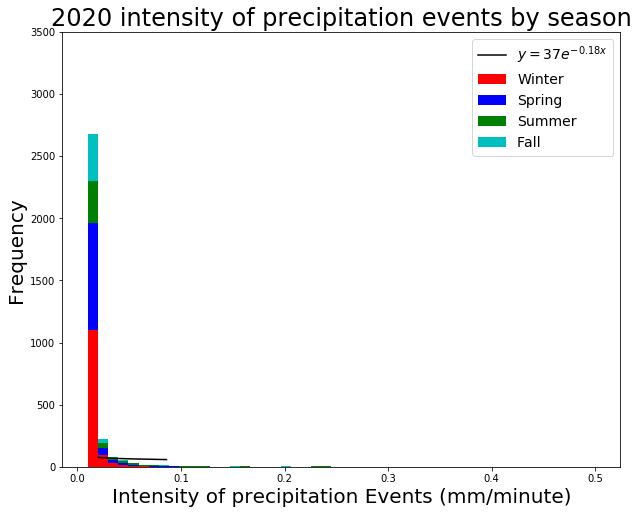

In [45]:
plt.figure(figsize = (10,8))
plt.hist([ Winten20, Sp_inten20, Su_inten20,Finten20], bins = 50, range= (0.01,0.5), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
#plt.xscale('log')
plt.ylim(0,3500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(intens20, int_20coef[1]*np.exp(np.log(intens20)*int_20coef[0]), color = 'k' )
plt.legend(labels = ['$y = 37 e^{-0.18x}$', 'Winter','Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )